## Project Overview

## You have been given a classified data set from a "Company". You are responsible for predicting the target class in the data set. Though the feature set means nothing to you and represents nothing meaningful the values are significant to the company. For the privacy of the data the features have been given arbitrary names to use.


## Choose an appropriate K value using the K Nearest Neighbor algorithm. Using the elbow method find the best K value that will generate the lowest error rate

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data = pd.read_csv("resources/Classified Data", index_col=0)

In [101]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


## Scale the data

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scalar = StandardScaler()

In [104]:
scalar.fit(data.drop("TARGET CLASS", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [105]:
scaled_features = scalar.transform(data.drop("TARGET CLASS", axis = 1))

### Create a feature data frame for our new scaled data 
- Will need to set the columns for all features except the target

In [106]:
features = pd.DataFrame(scaled_features, columns= data.columns[:-1])

In [107]:
features

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Train test Split

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = features
y = data["TARGET CLASS"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
X.shape

(1000, 10)

### We are trying to come up with a model that will predict is a person will be ina target class or not
### K = 1

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
model = KNeighborsClassifier(n_neighbors=1)

## Fitting model 

In [114]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predicitons

In [115]:
prediction = model.predict(X_test)

In [116]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

## Metrics

In [117]:
from sklearn.metrics import classification_report,confusion_matrix, explained_variance_score

In [118]:
print(confusion_matrix(y_test, prediction))

[[151   8]
 [ 15 126]]


In [119]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [120]:
explained_variance_score(y_test, prediction)

0.6944109906775502

## lets see if we can improve this by choosing a better K value
- We will use the elbow method to chose the better K value
- looks as though a K around 34 would give us a lower error rate

In [121]:
error_rate = []
for i in range(1,40):
    mod = KNeighborsClassifier(n_neighbors=i)
    mod.fit(X_train,y_train)
    pred_i = mod.predict(X_test)
    ## Average error rate
    error_rate.append(np.mean(pred_i != y_test))

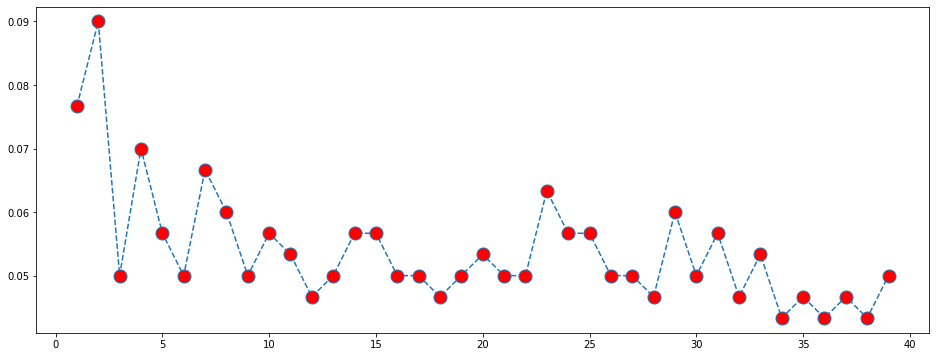

In [122]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_rate, ls = "--", marker = "o", mfc = "r", ms = 13);

In [123]:
mod = KNeighborsClassifier(n_neighbors=34)
mod.fit(X_train,y_train)
pred = mod.predict(X_test)

## Metrics
 - we see a dramatic improvment in the predicitions with a larger K value

In [124]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [125]:
print(confusion_matrix(y_test, pred))

[[153   6]
 [  7 134]]


In [126]:
explained_variance_score(y_test,pred)

0.8260850171729336

## Prediction on Random data
- will randomly select a index for the scaled data to test random predictions

In [154]:
from random import randint
random_index = randint(1, len(features))
random_data = features.iloc[random_index]

In [155]:
random_data

WTT   -0.456040
PTI   -0.434018
EQW    1.233983
SBI   -2.144657
LQE   -0.437258
QWG    0.506206
FDJ    0.110047
PJF    1.345259
HQE   -1.299441
NXJ   -1.750689
Name: 226, dtype: float64

## Get values and shape for predictions

In [156]:
random_d = random_data.values.reshape(1,10)

In [157]:
mod.predict(random_d)

array([0])

## Actual Value

In [158]:
data.iloc[random_index]["TARGET CLASS"]

0.0